In [1]:
# Importing necssary modules
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scripts.utils import load_data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Data folder path
base_directory = '../rawdata'
file_extension = "*.csv"

In [3]:
device_list = ['Danmini_Doorbell', 'Ecobee_Thermostat', 
                        'Ennio_Doorbell', 'Philips_B120N10_Baby_Monitor',
                        'Provision_PT_737E_Security_Camera', 'Provision_PT_838_Security_Camera',
                        'Samsung_SNH_1011_N_Webcam', 'SimpleHome_XCS7_1002_WHT_Security_Camera',
                        'SimpleHome_XCS7_1003_WHT_Security_Camera']

#### Loading Data into pandas Dataframe

In [4]:
danmini_doorbell_df = load_data(base_directory, file_extension, 'Danmini_Doorbell')

In [5]:
ecobee_thermostat_df = load_data(base_directory, file_extension, 'Ecobee_Thermostat')

In [6]:
ennio_doorbell_df = load_data(base_directory, file_extension, 'Ennio_Doorbell')

In [7]:
baby_monitor_df = load_data(base_directory, file_extension, 'Philips_B120N10_Baby_Monitor')

In [8]:
provision_cam1_df = load_data(base_directory, file_extension, 'Provision_PT_737E_Security_Camera')

In [9]:
provision_cam2_df = load_data(base_directory, file_extension, 'Provision_PT_838_Security_Camera')

In [10]:
samsung_cam_df = load_data(base_directory, file_extension, 'Samsung_SNH_1011_N_Webcam')

In [11]:
simplehome_cam1_df = load_data(base_directory, file_extension, 'SimpleHome_XCS7_1002_WHT_Security_Camera')

In [12]:
simplehome_cam2_df = load_data(base_directory, file_extension, 'SimpleHome_XCS7_1003_WHT_Security_Camera')

#### Checking out Missing values

In [13]:
danmini_doorbell_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [14]:
ecobee_thermostat_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [15]:
ennio_doorbell_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [16]:
baby_monitor_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [17]:
provision_cam1_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [18]:
provision_cam2_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [19]:
samsung_cam_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [20]:
simplehome_cam1_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [21]:
simplehome_cam2_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

#### Scaling & PCA

In [30]:
def scaling_pca(df, n_components):
    X = df.drop(['label','device'], axis=1).values
    
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_std)
    
    return X_pca

In [31]:
danmini_doorbell_df_pca = scaling_pca(danmini_doorbell_df, 10)

In [32]:
print("original shape:   ", danmini_doorbell_df.shape)
print("transformed shape:", danmini_doorbell_df_pca.shape)

original shape:    (1018298, 117)
transformed shape: (1018298, 10)


In [47]:
import matplotlib.pyplot as plt

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

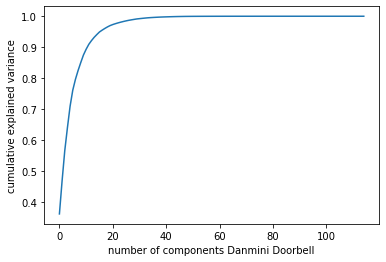

In [48]:
X = danmini_doorbell_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Danmini Doorbell')
plt.ylabel('cumulative explained variance');

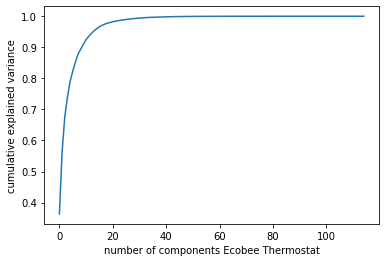

In [49]:
X = ecobee_thermostat_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Ecobee Thermostat')
plt.ylabel('cumulative explained variance');

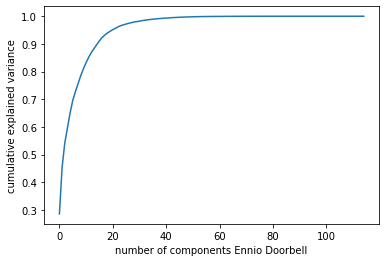

In [50]:
X = ennio_doorbell_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Ennio Doorbell')
plt.ylabel('cumulative explained variance');

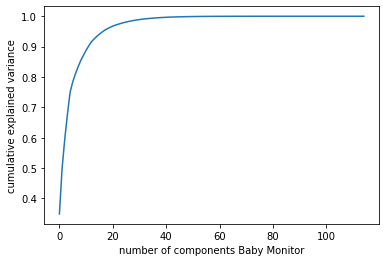

In [51]:
X = baby_monitor_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Baby Monitor')
plt.ylabel('cumulative explained variance');

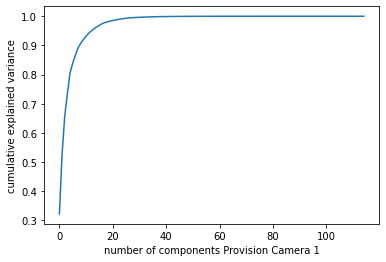

In [52]:
X = provision_cam1_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Provision Camera 1')
plt.ylabel('cumulative explained variance');

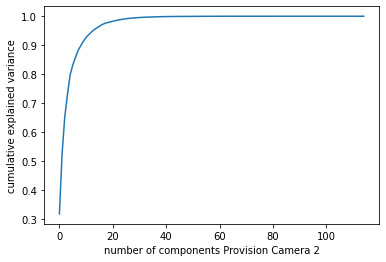

In [53]:
X = provision_cam2_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Provision Camera 2')
plt.ylabel('cumulative explained variance');

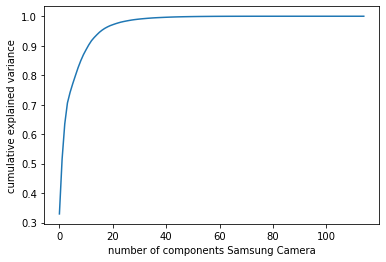

In [54]:
X = samsung_cam_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Samsung Camera')
plt.ylabel('cumulative explained variance');

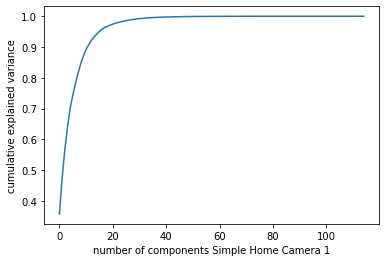

In [55]:
X = simplehome_cam1_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Simple Home Camera 1')
plt.ylabel('cumulative explained variance');

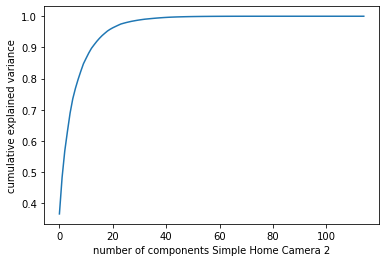

In [56]:
X = simplehome_cam2_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Simple Home Camera 2')
plt.ylabel('cumulative explained variance');